<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/7%EC%A3%BC%EC%B0%A8/MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 준비
# 패션 MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# 데이터 정규화 (0~255 범위의 픽셀 값을 0~1 범위로 조정)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 레이블을 원-핫 인코딩으로 변환
# 예: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# 2. DNN 모델 구축
model = Sequential([
    # 28x28 크기의 2차원 이미지를 784개의 1차원 벡터로 변환
    Flatten(input_shape=(28, 28)),
    # 128개의 뉴런을 가진 은닉층, 활성화 함수로 ReLU 사용
    Dense(128, activation='relu'),
    # 10개의 뉴런을 가진 출력층, 활성화 함수로 Softmax 사용 (다중 클래스 분류)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # 다중 클래스 분류를 위한 손실 함수
              metrics=['accuracy']) # 평가 지표로 정확도 사용

In [8]:
# 4. 모델 훈련
# 10 에포크(epoch) 동안 훈련
history = model.fit(x_train, y_train_categorical, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5373 - loss: 1.5706 - val_accuracy: 0.7393 - val_loss: 0.7364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7513 - loss: 0.7027 - val_accuracy: 0.7769 - val_loss: 0.6125
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7837 - loss: 0.5976 - val_accuracy: 0.7968 - val_loss: 0.5603
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8069 - loss: 0.5490 - val_accuracy: 0.8102 - val_loss: 0.5294
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8156 - loss: 0.5173 - val_accuracy: 0.8204 - val_loss: 0.5031
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8244 - loss: 0.4928 - val_accuracy: 0.8254 - val_loss: 0.4872
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8319 - loss: 0.4754 - val_accuracy: 0.8312 - val_loss: 0.4738
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8337 - loss: 0.4691 - 

In [9]:
# 5. 모델 평가
# 테스트 데이터셋으로 모델의 성능(손실, 정확도) 평가
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print(f'\n테스트 정확도: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8376 - loss: 0.4611

테스트 정확도: 0.8316


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


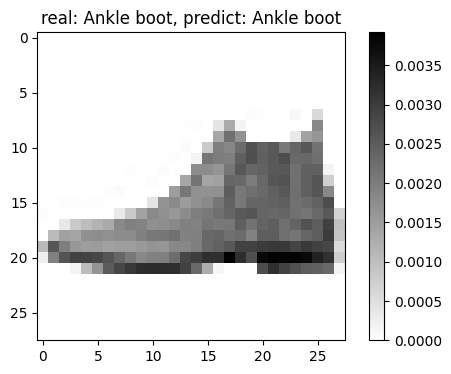

In [12]:
# 6. 예측 및 결과 시각화
# 테스트 데이터의 첫 번째 이미지로 예측 수행
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

plt.figure(figsize=(6, 4))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"real: {class_names[true_label]}, predict: {class_names[predicted_label]}")
plt.colorbar()
plt.grid(False)
plt.show()